In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Some initial parameters.
years = [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 
         2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050]
b = 2.017
Di_dry = 0.302
Di_flooded = 0.672

In [3]:
## Define inputs as functions.
def ask1():
    production_years = 0
    q1 = input("""I want to consider coal mine closures in the next __ years.
    (Input a number, or hit return for default.) """)
    if q1.isdigit():
        production_years = int(q1)
        return production_years
    elif q1.lower() == "":
        production_years = 1
        print("Default = 1 year.")
        return production_years
    else:
        print("Not a valid input.")
        ask1()

def ask2():
    coal_production = []
    q2 = input("""Which coal production forecast?
    Input 'info' to see options, or hit return for default. """)
    if q2.lower() == "info":
        print("""'EIA': Energy Information Association's Annual Energy Outlook 2020 Coal Production Forecasts.""")
        ask2()
    elif q2.lower() == "eia":
        coal_production = [442.861272, 428.98104, 435.525624, 415.021608, 411.54426, 394.532784, 409.4955, 408.471768,
                       405.04014, 401.961816, 401.42394, 399.451068, 398.7099, 400.991436, 398.13984, 394.628148,
                       392.405976, 391.904352, 388.400364, 386.64108, 385.63866, 384.313716, 384.122988,
                       383.962608, 383.930532, 382.910616, 385.213068, 384.607296, 384.273828, 383.38416, 384.307416]
        return coal_production
    elif q2 == "":
        coal_production = [442.861272, 428.98104, 435.525624, 415.021608, 411.54426, 394.532784, 409.4955, 408.471768,
                       405.04014, 401.961816, 401.42394, 399.451068, 398.7099, 400.991436, 398.13984, 394.628148,
                       392.405976, 391.904352, 388.400364, 386.64108, 385.63866, 384.313716, 384.122988,
                       383.962608, 383.930532, 382.910616, 385.213068, 384.607296, 384.273828, 383.38416, 384.307416]
        print("Default = EIA.")
        return coal_production
    else:
        print("Not a valid input.")
        ask2()
    

def ask3():
    abandonment_rate = 0.0
    q3 = input("""The coal abandonment rate is 'the fraction of coal that would have been produced 
    but is not produced because of mine closure' (Kholod et al., 2020). What abandonment rate would you
    like to use? (Input a percentage, or hit return for the default value of 5%.) """)
    if q3 == "":
        abandonment_rate = .05
        print("Default = 5%.")
        return abandonment_rate
    else:
        try:
            if float(q3) >= 0:
                if float(q3) <= 100:
                    abandonment_rate = float(q3)/100
                    return abandonment_rate
            else:
                print("Not a valid input.")
                ask3()
        except ValueError:
            print("Not a valid input.")
            ask3()
    
def ask4():
    ef_leq200 = 0
    ef_200to400 = 0
    ef_geq400 = 0
    q4 = input("""Which set of emission factors?
    Input 'info' to see options, or hit return for default. """)
    if q4.lower() == "info":
        print("""
        'IPCC': IPCC's Tier 1 GHG inventory emission factors (2006).
        'M2CM': standard Languir isotherms, adjusted using a 1.7 emission factor coefficient
        (Kholod et al., 2020).
        'Manual': manually input emission factors for <200m, 200-400m, and >400m.""")
        ask4()
    elif q4.lower() == "ipcc":
        ef_leq200 = 10
        ef_200to400 = 18
        ef_geq400 = 25
        return (ef_leq200, ef_200to400, ef_geq400)
    elif q4 == "":
        print("Default: IPCC.")
        ef_leq200 = 10
        ef_200to400 = 18
        ef_geq400 = 25
        return (ef_leq200, ef_200to400, ef_geq400)
    elif q4.lower() == "manual":
        try:
            ef_leq200 = float(input("<200m emission factor: "))
            ef_200to400 = float(input("200m to 400m emission factor: "))
            ef_geq400 = float(input(">400m emission factor: "))
            return (ef_leq200, ef_200to400, ef_geq400)
        except ValueError:
            print("Not a valid input.")
            ask4()
    elif q4.lower() == "m2cm":
        ef_leq200 = 14.9
        ef_200to400 = 18.9
        ef_geq400 = 21.6
        return (ef_leq200, ef_200to400, ef_geq400)
    
def ask5():
    flood_rate = 0.0
    q5 = input("""Last question — what abandoned mine flood rate would you like to use?
    (Enter as a percentage, or hit return for the default default value of 50.)""")
    if q5 == "":
        flood_rate = .5
        print("Default: 50%.")
        return flood_rate
    else:
        try:
            if float(q5) >= 0:
                if float(q5) <= 100:
                    flood_rate = float(q5)/100
                    return flood_rate
            else:
                print("Not a valid input.")
                ask5()
        except ValueError:
            print("Not a valid input.")
            ask5()
            
def cmm_to_amm():
    try:
        py = int(ask1())
        cp = ask2()[0:py]
        ar = float(ask3())
        efs = ask4()
        new_amm = [efs[1] * ar * x * 10 ** 6 for x in cp]
        fr = ask5()
        return (new_amm, py, fr)
    except TypeError:
        print("Whoops! Something went wrong. Let's start over.")
        cmm_to_amm()

I want to consider coal mine closures in the next __ years.
    (Input a number, or hit return for default.) 
Default = 1 year.
Which coal production forecast?
    Input 'info' to see options, or hit return for default. 
Default = EIA.
The coal abandonment rate is 'the fraction of coal that would have been produced 
    but is not produced because of mine closure' (Kholod et al., 2020). What abandonment rate would you
    like to use? (Input a percentage, or hit return for the default value of 5%.) 
Default = 5%.
Which set of emission factors?
    Input 'info' to see options, or hit return for default. 
Default: IPCC.
Last question — what abandoned mine flood rate would you like to use?
    (Enter as a percentage, or hit return for the default default value of 50.)
Default: 50%.


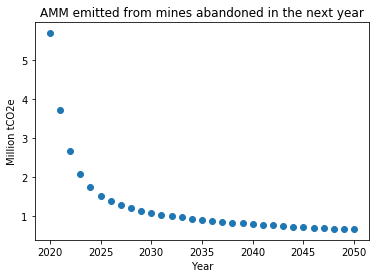

In [4]:
## Run calculator. Output is a MtCO2e vs year graph.

inputs = cmm_to_amm()
new_amm_cm = inputs[0]
closing_years = inputs[1]
fr = inputs[2]
i = 0
total_amm = []
while i < len(years):
    total_amm.append(0)
    i += 1
i = 0
while i < len(new_amm_cm):
    t = 0
    while t < len(years):
        if t < i:
            total_amm[t] += 0
        else:
            total_amm[t] += (1-fr) * new_amm_cm[i]*((1+b*Di_dry*(t-i)) ** (-1/b))
            total_amm[t] += fr * new_amm_cm[i]*np.exp(-t * Di_flooded)
        t+=1
    i+=1
total_amm_tco2e = [0.01428 * x for x in total_amm]
total_amm_Mtco2e = [x/(10**6) for x in total_amm_tco2e]
plt.scatter(x=years, y=total_amm_Mtco2e)
plt.xlabel("Year")
plt.ylabel("Million tCO2e")
if int(closing_years) == 1:
    plt.title("AMM emitted from mines abandoned in the next year")
else:
    plt.title("AMM emitted from mines abandoned in the next %s years" % str(closing_years))